# Assignment 2: Spam Classification with SVM

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the assignment, you will use SVMs to build your own spam filter. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


---
## 1. PRE-PROCESSING THE DATA (15 pts)

**Data Acquiring:** Download the dataset from https://archive.ics.uci.edu/ml/datasets/Spambase

**Data Splitting:** Put data into the format needed for SVM, then split it into 80% training, 20% testing (each should have approximately the same proportion of position and negative examples).

**Data Discovery:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. 

**Feature Scaling** You can use the standard Scikit-Learn library can write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

### Data Acquiring

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix  # optional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def load_data(dir_path, filename, csv_header_names):
    csv_path = os.path.join(dir_path, filename)
    return pd.read_csv(csv_path, header=None, names=csv_header_names)

#This has the names of all of the features and y field (spam)
fields = open("spambase/field_names", "r").read().splitlines()
data=load_data("spambase", "spambase.data", fields)
features = fields[:-1]
y_field = fields[-1]

### Data Discovery - Correlation Matrix

In [2]:
corr_matrix = data.corr()
corr_matrix[y_field].sort_values(ascending=False)

spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_font           

### Data Discovery - Scatter Plot for correlated features

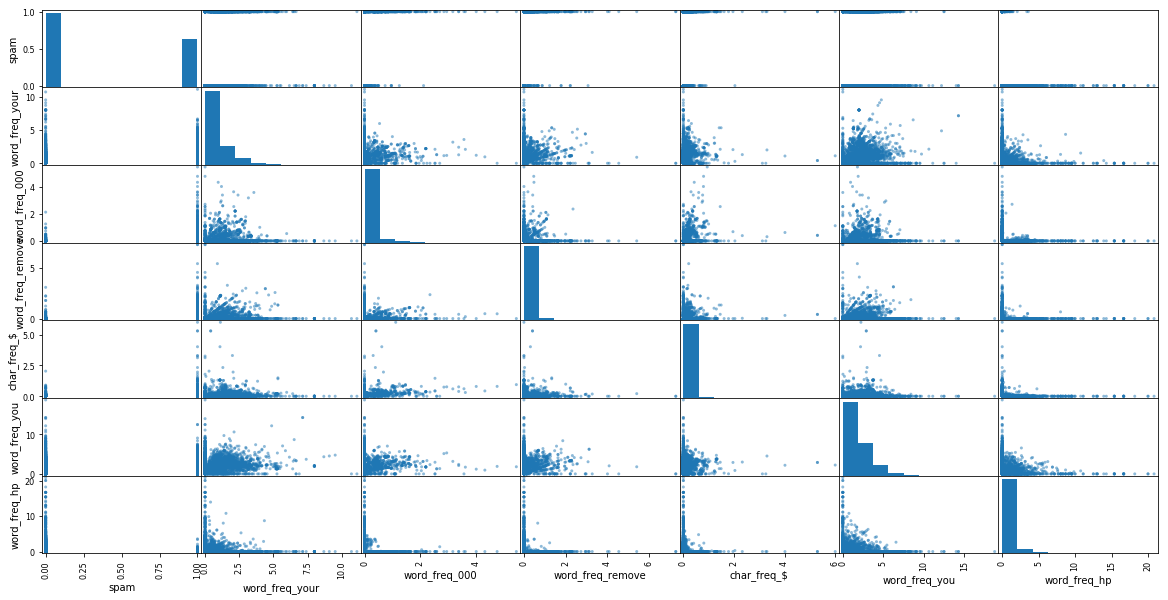

In [3]:
interesting_fields=["spam","word_freq_your","word_freq_000","word_freq_remove","char_freq_$","word_freq_you","word_freq_hp"]
x=scatter_matrix(data[interesting_fields], figsize=(20, 10))

### Data Cleaning

The spambase dataset mentions that there are no missing attribute values. Hence no data cleaning is needed.

### Feature Scaling and Data Splitting

In [39]:
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

#Split data into X and y. Then into train and test with stratify on the "spam" field
X=data[features]
y=data[y_field]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

- - -
## 2. TRAINING SVM FOR SPAM CLASSIFICATION (15 pts)

Run your linear SVM classifier on the training data, and test the resulting model on the test data. In this section, you may use the default **loss function** (hinge) and **default** value of the C hyperparameter (=1.0):

* Report accuracy, precision, recall?
* Create an ROC curve for this SVM on the test data, using 200 or more evenly spaced thresholds. You may use library function calls to create the ROC curve?

**Implementation Notes:** You do NOT need to add a column of 1's to the $\mathbf{
x}$ matrix to have an intercept term

In [45]:
from sklearn.svm import LinearSVC

# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

# Testing your svm here
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve

print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(f"Precision = {precision_score(y_test, y_pred)}")
print(f"Recall = {recall_score(y_test, y_pred)}")

Accuracy = 0.9229098805646037
Precision = 0.9345238095238095
Recall = 0.8650137741046832


- - -
## 3. TUNING C FOR LINEAR SVM (15 pts)
In this part of the assignment, you will try using different values of the C parameter with SVMs. Your task is to try different values of C on this dataset. For example, when C is small, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point. When C is large, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data. 

In a 2-D feature space of your choice, you must be able to plot out the decision boundary of SVM for different values of C to earn credit for this section. Depends on your observation on the dataset, you must provide some justifications on the reason you select a certain value of C to tradeoff margin and data violation. 

In [6]:
# Use the following code to plot out your hyperparameter C
# You may plot multiple decision boundary corresponding to different C
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# plt.figure(figsize=(12,3))
# plt.subplot(121) 
# plt.xlabel("Feature 1", fontsize=14)
# plt.ylabel("Feature 2", fontsize=14)

- - -
## 4. SELECTING THE FEATURES WITH SVM (25 pts)

Once your learned a best linear SVM in previous sections, your task in this section is to select the best features. First, you must * Obtain the weight vector $\mathbf{w}$. Then, for the number of features $n = 2$ to 57, you will run the following (in a loop of course):

* Select the set of $n$ features that have the highest $\mathbf{w}_n$
* Train an SVM, $SVM_n$, on all training data, only using these $n$ features with the same hyperparameter C.
* Test $SVM_n$ on the test set (using the same $n$ features) to obtain accuracy.
* Plot accuracy on test data vs. $n$ number of features

In one paragraph, discuss the effects of feature selection including the top 5 features.

In [7]:
# Your feature selection code goes here


# Your paragraph goes here for this section

- - -
## 5. KERNELIZING SVM WITH THE GAUSSIAN RBF (30 pts)

In this part of the asisgnment, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable. 

$
    \mathbf{K}_{RBF}(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \exp(-\gamma ||\mathbf{x}^{(i)} -\mathbf{x}^{(j)}||^2).
$

Your task is to determine the best $C$ and $\gamma$ hyperparameters to use, run SVM on the spam data and report the performance in metrics similar to section 2. By using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for this dataset. 

Finally, run the version of SVM with the best hyperparameters on the test set, and plot out the comparison in terms of accuracy, precision, and recall, and the ROC curve) to those of linear SVM in Section 3. How much your SVM classifier perform better? 

**Implementation Note:** When implementing cross validation to select the best C and $\gamma$ parameter to use, you need to evaluate the error on the cross validation set. Recall that for classification, the error is defined as the fraction of the cross validation examples that were classified incorrectly.




In [8]:
from sklearn.svm import SVC
# hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2), ...
# for gamma, C in hyperparams:
#    rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=gamma, C=C))
#    rbf_kernel_svm_clf.fit(X_cv, y_cv)
#    # Your code to train and find the best value of C and gamma here

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 2:...".

Best of luck and have fun!